In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score
from scipy.stats import linregress


## Datos

In [ ]:
r = [40, 42.5, 45, 47.5, 50, 52.5, 55, 57.5, 60, 62.5, 65, 67.5, 70, 72.5, 75, 77.5, 80, 82.5, 85, 87.5, 90, 92.5, 95, 97.5, 100]
I = [4.09, 3.28, 2.96, 2.1, 1.857, 1.694, 1.548, 1.41, 1.277, 1.148, 1.071, 1.008, 0.933, 0.862, 0.805, 0.752, 0.712, 0.69, 0.653, 0.63, 0.565, 0.549, 0.508, 0.457, 0.433]

Creamos una tabla con los datos

In [ ]:
data = pd.DataFrame({'distancia':r , 'intensidad' : I})

# INVERSO
data['invDistancia2'] = 1 / data['distancia']**2

#LOGARITMOS
data['lnDist'] = np.log(data['distancia'])
data['lnInt'] =  np.log(data['intensidad'])

In [ ]:
data

,distancia,intensidad,invDistancia2,lnDist,lnInt
0,40.0,4.090,0.000625,3.688879,1.408545
1,42.5,3.280,0.000554,3.749504,1.187843
2,45.0,2.960,0.000494,3.806662,1.085189
3,47.5,2.100,0.000443,3.860730,0.741937
4,50.0,1.857,0.000400,3.912023,0.618962
5,52.5,1.694,0.000363,3.960813,0.527093
6,55.0,1.548,0.000331,4.007333,0.436964
7,57.5,1.410,0.000302,4.051785,0.343590
8,60.0,1.277,0.000278,4.094345,0.244514
9,62.5,1.148,0.000256,4.135167,0.138021


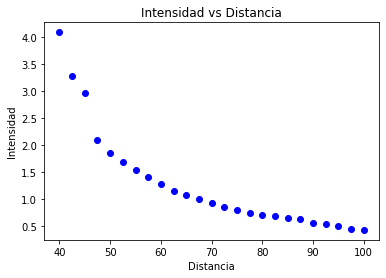

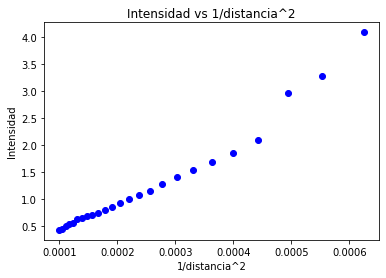

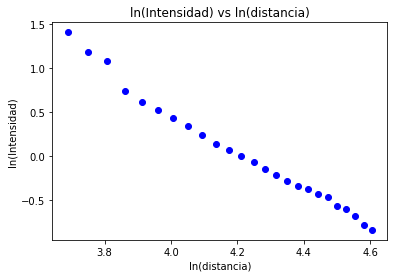

In [ ]:
# Graficar los datos

#DISTANCIA
plt.plot(data['distancia'], data['intensidad'], 'bo')
plt.xlabel('Distancia')
plt.ylabel('Intensidad')
plt.title('Intensidad vs Distancia')
plt.show()

#1 / DISTANCIA^2
plt.plot(data['invDistancia2'], data['intensidad'], 'bo')
plt.xlabel('1/distancia^2')
plt.ylabel('Intensidad')
plt.title('Intensidad vs 1/distancia^2')
plt.show()

#LOGARITMOS
plt.plot(data['lnDist'], data['lnInt'], 'bo')
plt.xlabel('ln(distancia)')
plt.ylabel('ln(Intensidad)')
plt.title('ln(Intensidad) vs ln(distancia)')
plt.show()

## Funcion de ajuste

In [ ]:
# AJUSTE1: y=a*x^n
def func(x, a, n):
    return a * x**n

# AJUSTE2: DEL INVERSO (LINEAL)
slopeI, interceptI, r_valueI, p_valueI, std_errI = linregress(data['invDistancia2'], data['intensidad'])

#AJUSTE3: LOGARITMOS
def funcln(x, m, b): 
  return m*x + b

#AJUSTE LINEAL PARA LOS LOGRARITMOS===================
slope, intercept, r_value, p_value, std_err = linregress(data['lnDist'], data['lnInt'])


In [ ]:
# AJUSTE1: Realizar el ajuste y obtener los parámetros a y n
popt, pcov = curve_fit(func, r, I)
a, n = popt

#AJUSTE2: 


#AJUSTE3: 
poptln, pcovln = curve_fit(funcln, data['lnDist'], data['lnInt'])
m, b = poptln


In [ ]:
# Coeficiente de determinación (R^2)
r2 = r2_score(I, func(r, *popt))

# Coeficiente de determinación (R^2)
#r2ln = r2_score(data['lnInt'], func(data['lnDist'], *poptln))

# RESULTADOS

In [ ]:
# Mostrar resultados

print('NORMAAAAAALL')
print('a=', a)
print('n=', n)
print("R^2:", r2)

print('===========')

#Mostrar resultados

print('INVERSOOOOOO')
print('Pendiente:', slopeI)
print('Intersección:', interceptI)
print('Coeficiente de correlación:', r_valueI)
print('Valor p:', p_valueI)
print('Error estándar:', std_errI)


print('===========')

# Mostrar resultados

print('LOGARITMOOOOOOOOS')
print('m=', m)
print('b=', b)
#print("R^2:", r2ln) # ESTA MAL
print("R^2:", r_value)


print('==')

#RESULTADOOOOS LOGARITMO LINEAL
print('Pendiente:', slope)
print('Intersección:', intercept)
print('Coeficiente de correlación:', r_value)
print('Valor p:', p_value)
print('Error estándar:', std_err)

NORMAAAAAALL
a= 55903.79951105112
n= -2.600510007382431
R^2: 0.9783796647303611
INVERSOOOOOO
Pendiente: 6200.468262272734
Intersección: -0.2998492918114213
Coeficiente de correlación: 0.9803465684052479
Valor p: 1.0264594169946058e-17
Error estándar: 260.1780975096029
LOGARITMOOOOOOOOS
m= -2.2484676003598723
b= 9.514022387610584
R^2: -0.9929714176816198
==
Pendiente: -2.2484675996697057
Intersección: 9.514022384702812
Coeficiente de correlación: -0.9929714176816198
Valor p: 7.987577361413439e-23
Error estándar: 0.05588179799334075


# GRAFICAS

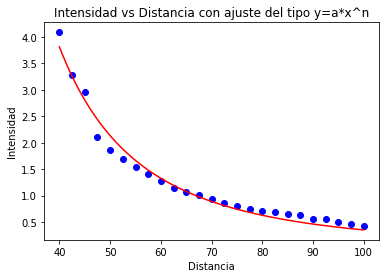

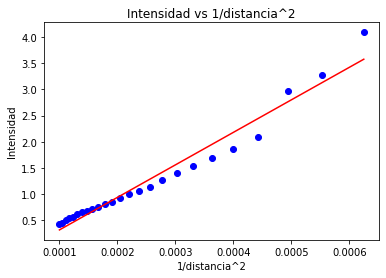

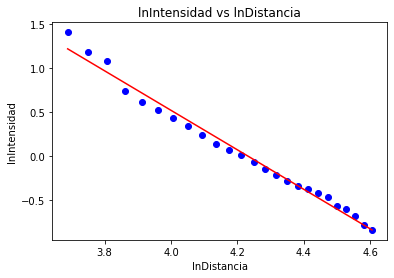

In [ ]:
# INTENSIDAD VS DISTANCIA
plt.plot(data['distancia'], data['intensidad'], 'bo', label='Datos')

r_fit = np.linspace(min(r), max(r), 100)
plt.plot(r_fit, func(r_fit, a, n), 'r-', label='Ajuste')

plt.xlabel('Distancia')
plt.ylabel('Intensidad')
plt.title('Intensidad vs Distancia con ajuste del tipo y=a*x^n')
plt.show()

# INTENSIDAD VS 1/DISTANCIA^2
plt.plot(data['invDistancia2'], data['intensidad'], 'bo')
plt.plot(data['invDistancia2'], slopeI*data['invDistancia2']+interceptI, 'r-', label='Ajuste lineal')
plt.xlabel('1/distancia^2')
plt.ylabel('Intensidad')
plt.title('Intensidad vs 1/distancia^2')
plt.show()

# LOG(INTENSIDAD) VS LOG(DISTANCIA)
plt.plot(data['lnDist'], data['lnInt'], 'bo')
plt.plot(data['lnDist'], slope*data['lnDist']+intercept, 'r-', label='Ajuste lineal')
plt.xlabel('lnDistancia')
plt.ylabel('lnIntensidad')
plt.title('lnIntensidad vs lnDistancia')
plt.show()